In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
x = np.linspace(0,1,10)

beta_true = np.array([1,1])

t = beta_true[0] + beta_true[1]*x + np.random.normal(0,.1,len(x))

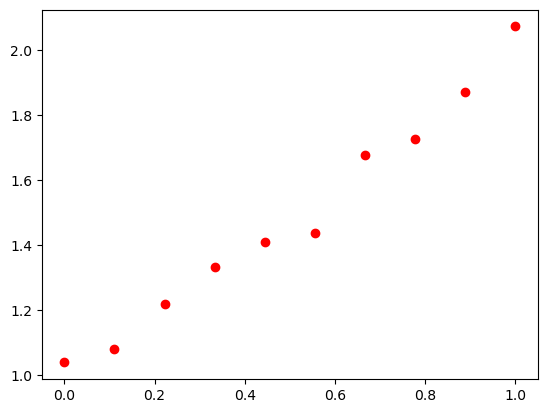

In [12]:
plt.scatter(x, t, c='r')
plt.show()



Implementation de la descente du gradient

In [13]:
n = len(x)  # nombre d'observations
beta = np.random.normal(0, 1, (2,))
max_iter = 100
eps = 0.1
loss = []

for iter in range(max_iter):
    grad = np.zeros((2,))
    loss_iter = 0
    
    for i in range(n):
        r = t[i] - (beta[0] + beta[1]*x[i])  # résidu
        grad += (-2/n) * r * np.array([1, x[i]])
        loss_iter += (1/n) * r**2
    
    loss.append(loss_iter)
    beta -= eps * grad

print("Beta final =", beta)


Beta final = [1.01548722 0.94823325]


In [14]:
xtest = np.linspace(0,1,100)

pred = beta[0] + beta[1]*xtest

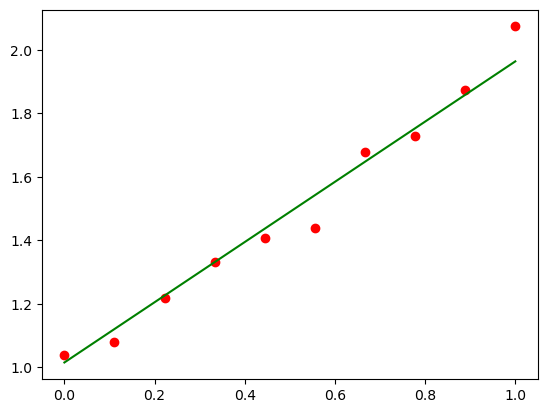

In [15]:
plt.plot(xtest, pred, c='g')
plt.scatter(x, t, c='r')
plt.show()

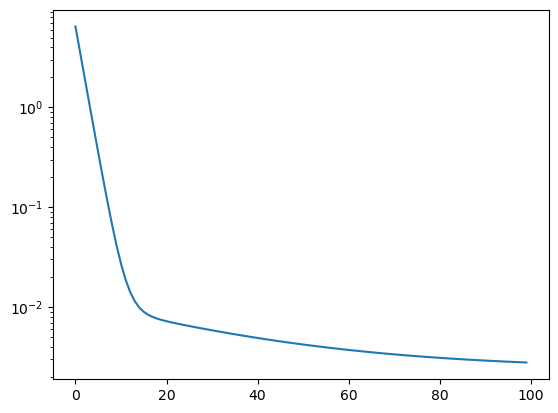

In [16]:
plt.semilogy(loss)
plt.show()



Gradient Stochastique

In [29]:
x = np.linspace(0, 10, 100)
beta_true = np.array([1, 1])
t = beta_true[0] + beta_true[1]*x + np.random.normal(0, 0.1, len(x))


beta = np.random.normal(0, 1, (2,))
epochs = 10     # réduit pour ne pas avoir trop de points
eps = 0.01
n = len(x)

# --- Historique du loss après chaque mise à jour ---
loss_history = []

# --- SGD ---
for epoch in range(epochs):
    arr = np.arange(n)
    np.random.shuffle(arr)
    
    for i in arr:
        # prédiction
        y_pred = beta[0] + beta[1] * x[i]
        
        # résidu
        r = t[i] - y_pred
        
        # gradient
        grad = (-2/n) * r * np.array([1, x[i]])
        
        # mise à jour
        beta -= eps * grad
        
        # loss pour cet exemple
        loss_history.append(r**2)
    
    print(f"Epoch {epoch+1}, beta = {beta}")

Epoch 1, beta = [1.46352315 0.43651551]
Epoch 2, beta = [1.49703678 0.67721718]
Epoch 3, beta = [1.51239111 0.79813989]
Epoch 4, beta = [1.51873853 0.85870703]
Epoch 5, beta = [1.52061785 0.88902165]
Epoch 6, beta = [1.52043897 0.90501497]
Epoch 7, beta = [1.51926733 0.91422178]
Epoch 8, beta = [1.51725346 0.91785142]
Epoch 9, beta = [1.51502929 0.92000839]
Epoch 10, beta = [1.51277815 0.92184693]


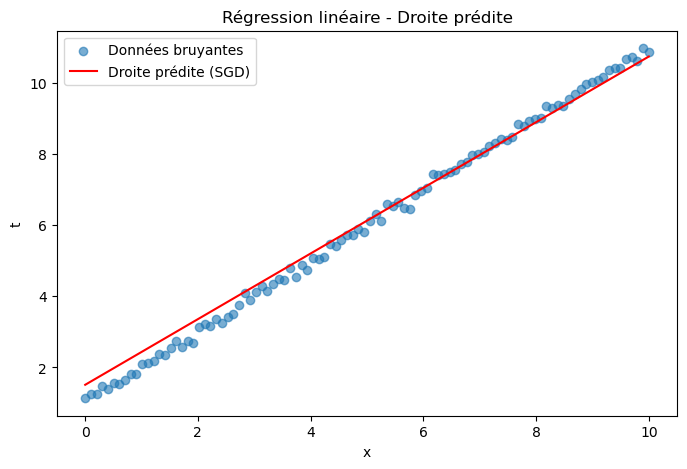

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(x, t, label="Données bruyantes", alpha=0.6)
plt.plot(x, beta[0] + beta[1]*x, "r-", label="Droite prédite (SGD)")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Régression linéaire - Droite prédite")
plt.legend()
plt.show()

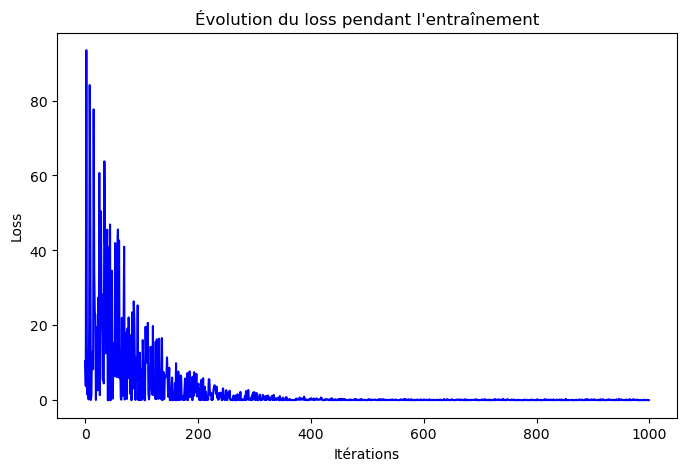

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(len(loss_history)), loss_history, "b-")
plt.xlabel("Itérations")
plt.ylabel("Loss")
plt.title("Évolution du loss pendant l'entraînement")
plt.show()